In [21]:
#Import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [3]:
#get the current working directory
print(os.getcwd())

C:\Users\BrindhaM\Documents\CelStrat MlL\My Site\Polynomial and logistic Regression


In [4]:
#read the file
df=pd.read_csv("Insurance.csv")

In [6]:
#print the shape of the data
print(df.shape)
#print the columns
df.columns.values

(10, 2)


array(['Age', 'Insurance Premium (Rs)'], dtype=object)

In [7]:
#print the contents
df

,Age,Insurance Premium (Rs)
0,25,4500
1,30,5000
2,35,6000
3,40,8000
4,45,11000
5,50,15000
6,55,20000
7,60,30000
8,65,50000
9,70,100000


In [18]:
#start the preprocessing
#cehck the null values
#Dont use Count.Use Sum
df.isnull().sum()

Age                       0
Insurance Premium (Rs)    0
dtype: int64

In [19]:
#check the correlation
print(df.corr())
#The result shwos the premium tnds to increase with age

                             Age  Insurance Premium (Rs)
Age                     1.000000                0.817949
Insurance Premium (Rs)  0.817949                1.000000


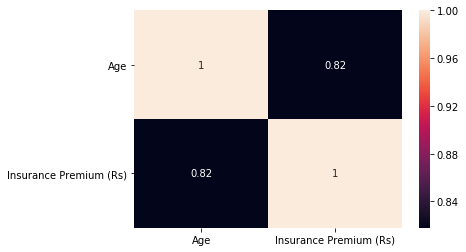

In [23]:
#print the correlation using heatmap of sns
sns.heatmap(df.corr(),annot=True)

In [63]:
#Divide the data into indepdent and depenant variable
X=df['Age']
Y=df['Insurance Premium (Rs)']

In [64]:
#Print the contents
X.shape

(10,)

In [65]:
Y.shape

(10,)

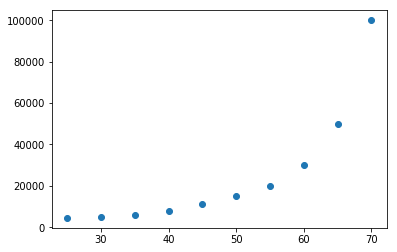

In [66]:
#Scatter plot the view X vs Y
plt.scatter(X,Y)

In [71]:
#Lets firt the data using linear regrssion
from sklearn.linear_model import LinearRegression
linearregressor=LinearRegression()
#Before fitting the model, pls rshap the input to 2D as model fitting expects 2D shape.
#Reshape using values.reshape
X=X.reshape(-1,1)
#print X
X.shape


(10, 1)

In [72]:
#fit the data 
#Only precitor is required to be 2D whereas outut can be 1D
linearregressor.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

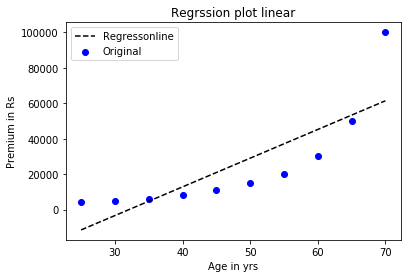

In [73]:
#Lets visualize the plot
fig=plt.figure()
#Create an axes for the figure
ax=plt.axes()
#Satter plot with age s X axis , premium as y axis
#If label is not provided,Y label is used as label for the line
ax.scatter(X,Y,color='blue',label='Original')
#plot with age s X axis , predicted(premium) as y axis
ax.plot(X,linearregressor.predict(X),'--k',label='Regressonline')
plt.xlabel('Age in yrs')
plt.ylabel('Premium in Rs')
plt.title("Regrssion plot linear")
plt.legend()
plt.show()

In [74]:
#Now that polynomial fits the data better.Lets evaluate the RMSE and R2 for each.
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
#calculate for linear model
rmse_linear = np.sqrt(mean_squared_error(Y, linearregressor.predict(X)))
r2_linear = r2_score(Y, linearregressor.predict(X))
print("rmse-linear",rmse_linear)
print("r2 score",r2_linear)

rmse-linear 16338.873519272616
r2 score 0.6690412331929894


In [75]:
#The above results show it is underfitted.
#lets apply polynomial regression (not linear growth may be 2x,3x growth)
from sklearn.preprocessing import PolynomialFeatures

#create a polynomial along with degree
#This generates multiple features..
Polyregressor=PolynomialFeatures(degree = 4)
poly_matrix=Polyregressor.fit_transform(X)


In [76]:
#print the poynomial matrix
poly_matrix

array([[1.0000000e+00, 2.5000000e+01, 6.2500000e+02, 1.5625000e+04,
        3.9062500e+05],
       [1.0000000e+00, 3.0000000e+01, 9.0000000e+02, 2.7000000e+04,
        8.1000000e+05],
       [1.0000000e+00, 3.5000000e+01, 1.2250000e+03, 4.2875000e+04,
        1.5006250e+06],
       [1.0000000e+00, 4.0000000e+01, 1.6000000e+03, 6.4000000e+04,
        2.5600000e+06],
       [1.0000000e+00, 4.5000000e+01, 2.0250000e+03, 9.1125000e+04,
        4.1006250e+06],
       [1.0000000e+00, 5.0000000e+01, 2.5000000e+03, 1.2500000e+05,
        6.2500000e+06],
       [1.0000000e+00, 5.5000000e+01, 3.0250000e+03, 1.6637500e+05,
        9.1506250e+06],
       [1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 6.5000000e+01, 4.2250000e+03, 2.7462500e+05,
        1.7850625e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07]])

In [77]:
poly_matrix.shape

(10, 5)

In [78]:
#Now apply the lieanr regression to the input
linearregressor.fit(poly_matrix,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

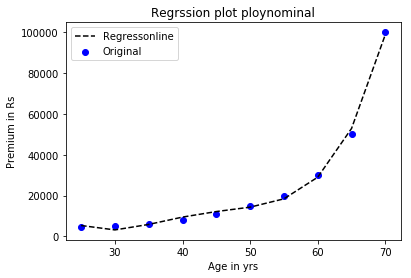

In [79]:
#Lets visualize the plot
fig=plt.figure()
#Create an axes for the figure
ax=plt.axes()
#Satter plot with age s X axis , premium as y axis
#If label is not provided,Y label is used as label for the line
ax.scatter(X,Y,color='blue',label='Original')
#plot with age s X axis , predicted(premium) as y axis
ax.plot(X,linearregressor.predict(poly_matrix),'--k',label='Regressonline')
plt.xlabel('Age in yrs')
plt.ylabel('Premium in Rs')
plt.title("Regrssion plot ploynominal")
plt.legend()
plt.show()

In [82]:
#Now that polynomial fits the data better.Lets evaluate the RMSE and R2 for each.
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
#calculate for linear model
rmse_linear = np.sqrt(mean_squared_error(Y, linearregressor.predict(poly_matrix)))
r2_linear = r2_score(Y, linearregressor.predict(poly_matrix))
print("rmse-Ploy",rmse_linear)
print("r2 Ploy",r2_linear)

rmse-Ploy 1450.323490962734
r2 Ploy 0.9973922891706613


In [ ]:
#As you can see, r2 increased from 66% to 99%